In [1]:
# Create a stacked bar graph of the count of companies grouped by countries which stacks companies by industry

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [3]:
import numpy as np

In [4]:
country_data = pd.read_csv('../data/companies.csv')

In [5]:
country_counts = country_data['Country'].value_counts()

country_counts.head(10)

United States     457
Germany           147
United Kingdom    128
France             83
Japan              76
Switzerland        58
Finland            55
China              52
Netherlands        50
Poland             41
Name: Country, dtype: int64

In [6]:
top_countries = country_counts.head(10).index.tolist()

focused_data = country_data[country_data['Country'].isin(top_countries)]

In [7]:
# This code groups countries and produces a count of how many companies there are in each industry.

country_industries = focused_data.groupby('Country')['Industry'].value_counts()
print(country_industries)

Country        Industry              
China          Industrials               14
               Financials                10
               Information Technology     8
               Energy                     5
               Consumer Discretionary     4
                                         ..
United States  Financials                28
               Materials                 18
               Energy                    12
               NGO                        8
               Real Estate                5
Name: Industry, Length: 104, dtype: int64


In [8]:
# Attempting to make stacked bar chart here:

# Reshape the data for plotting
stacked_data = country_industries.unstack()


<Figure size 1200x600 with 0 Axes>

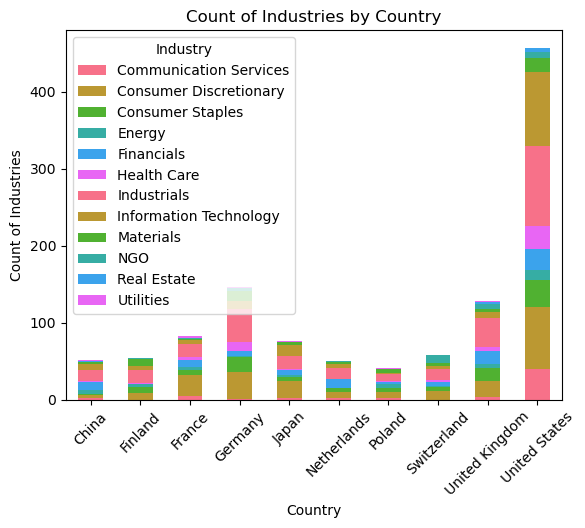

In [9]:
# Plot the stacked bar graph
plt.figure(figsize=(12, 6))
sns.set_palette("husl")
stacked_data.plot(kind='bar', stacked=True)
plt.title('Count of Industries by Country')
plt.xlabel('Country')
plt.ylabel('Count of Industries')
plt.xticks(rotation=45)
plt.legend(title='Industry')

plt.show()

#### Cleaning up the following code to have an order that matches my grade charts from before:

<Figure size 1200x600 with 0 Axes>

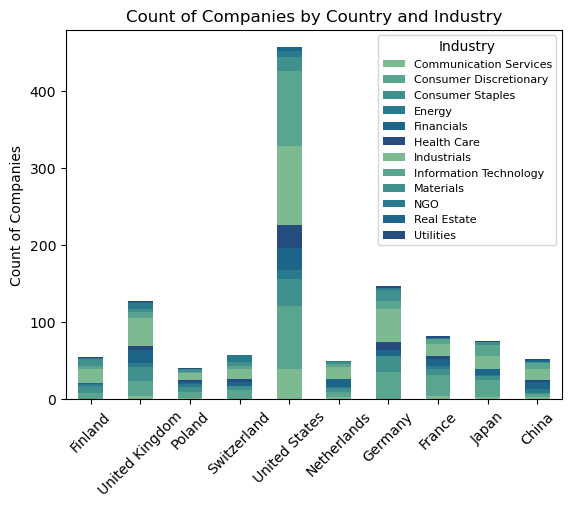

In [10]:
# Trying the above with a less garish color scheme:

# Custom_order, reindex, unstacking all part of making a consistent and more human-readable visual presentation.

custom_order = ['Finland', 'United Kingdom', 'Poland', 'Switzerland', 'United States', 'Netherlands', 'Germany', 'France', 'Japan', 'China']

reordered_data = country_industries.reindex(custom_order, level='Country')

stacked_data = reordered_data.unstack()

plt.figure(figsize=(12, 6))
sns.set_palette("crest")
stacked_data.plot(kind='bar', stacked=True)
plt.title('Count of Companies by Country and Industry')
plt.xlabel(None)
plt.ylabel('Count of Companies')
plt.xticks(rotation=45)
plt.legend(title='Industry', prop={'size': 8})

plt.show()

#### This looks marginally better, but the division of colors somewhat misses the point, if anything this is best understood as a proof of concept to me.

#### Interested now in trying to get pie charts to work to show all industries or all countries in a single snapshot.

In [13]:
# Will start by taking a count of companies by industry.
industry_counts = country_data['Industry'].value_counts()


In [16]:
industry_counts.head(12)

Industrials               403
Consumer Discretionary    313
Information Technology    195
Consumer Staples          167
Financials                130
Materials                  97
Communication Services     73
Health Care                70
Energy                     62
NGO                        40
Utilities                  17
Real Estate                14
Name: Industry, dtype: int64

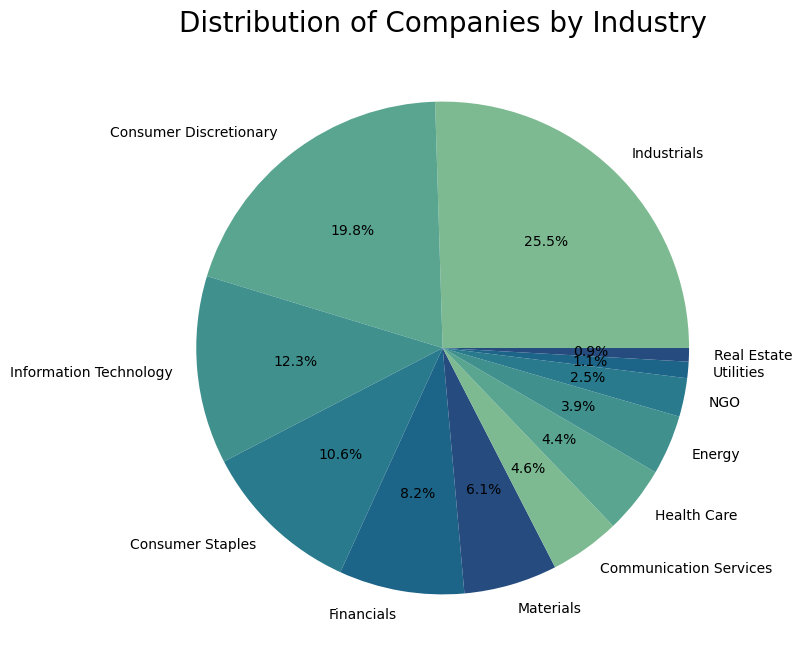

In [35]:
y = np.array([industry_counts])

labels = industry_counts.index
counts = industry_counts.values
plt.figure(figsize=(8,8))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Companies by Industry', fontsize = 20)


plt.show()

In [20]:
country_counts = country_data['Country'].value_counts()
country_counts.head(10)

United States     457
Germany           147
United Kingdom    128
France             83
Japan              76
Switzerland        58
Finland            55
China              52
Netherlands        50
Poland             41
Name: Country, dtype: int64

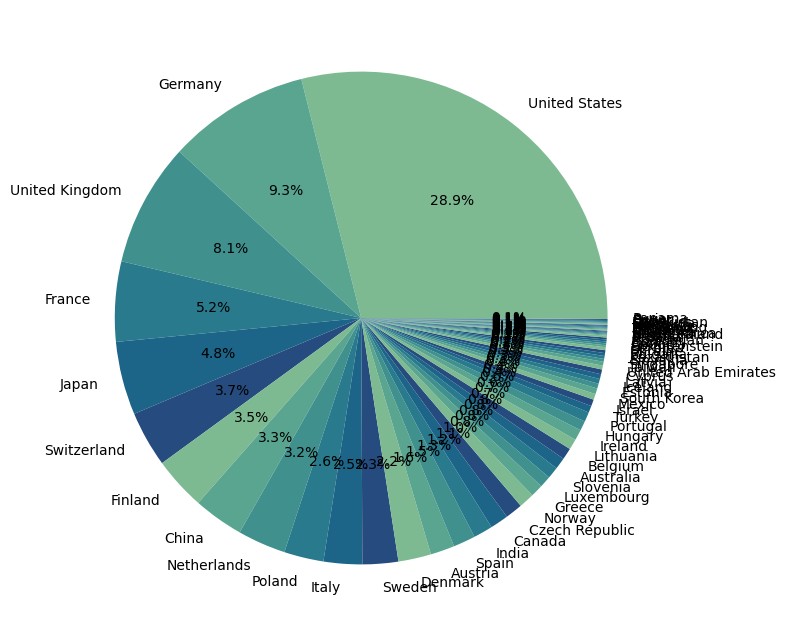

In [40]:
y = np.array([country_counts])

labels = country_counts.index
counts = country_counts.values
plt.figure(figsize=(8,8))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title(None)


plt.show()

### Good, but this is a messy visualization, I'll narrow down to top 10 again.

In [22]:
top_countries = country_counts.head(10).index.tolist()

focused_data = country_data[country_data['Country'].isin(top_countries)]

In [24]:
top_10_countries = focused_data['Country'].value_counts()

top_10_countries.head(10)

United States     457
Germany           147
United Kingdom    128
France             83
Japan              76
Switzerland        58
Finland            55
China              52
Netherlands        50
Poland             41
Name: Country, dtype: int64

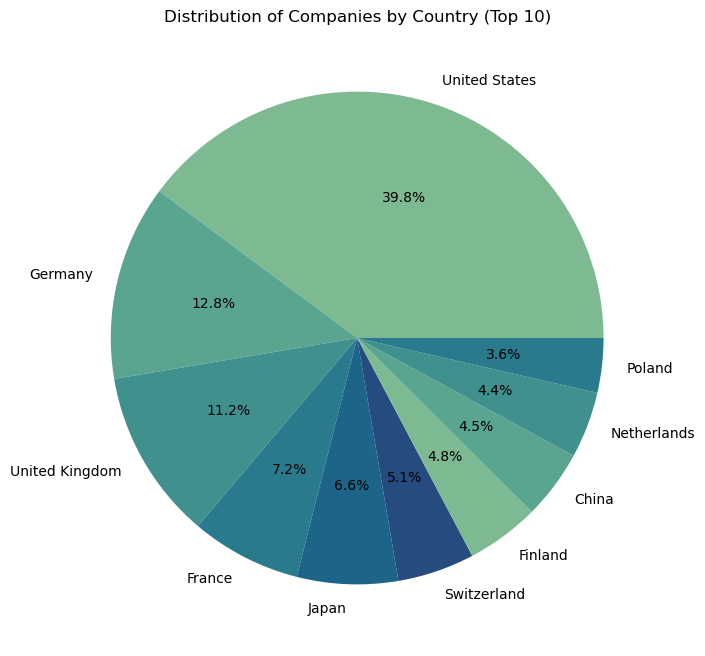

In [25]:
y = np.array([top_10_countries])

labels = top_10_countries.index
counts = top_10_countries.values
plt.figure(figsize=(8,8))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Companies by Country (Top 10)')


plt.show()